## Data Understanding

###### Let's first understand the shape, attributes etc. of the dataset.

In [1]:
# libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

In [2]:
train = pd.read_csv("E:/Data Science/ML/Predictive Analysis-2/SVM/Assignment/train.csv")

In [3]:
test = pd.read_csv("E:/Data Science/ML/Predictive Analysis-2/SVM/Assignment/test.csv")

In [ ]:
train.head()

In [ ]:
train.shape

In [ ]:
test.head()

In [ ]:
test.shape

In [4]:
col = train.columns
col

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [5]:
train.columns = col
print(train.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [6]:
order = list(np.sort(train['label'].unique()))
print(order)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [7]:
train.label.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

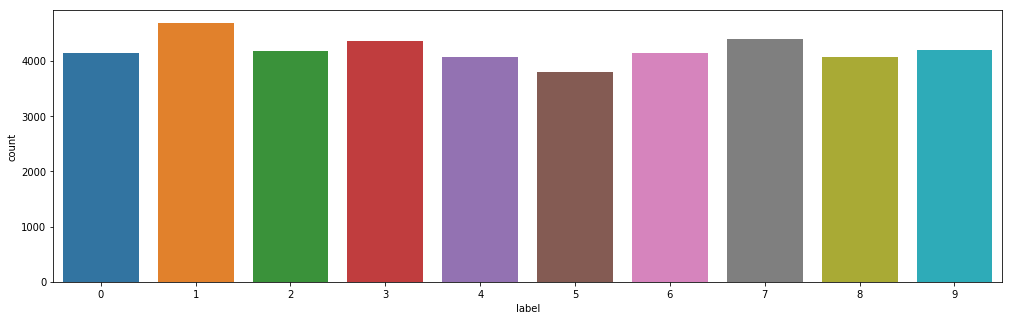

In [8]:
plt.figure(figsize=(17,5))
sns.countplot(x='label', data=train, order =[0,1,2,3,4,5,6,7,8,9])
plt.show()

In [9]:
train_means = train.groupby('label').mean()
train_means.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
label,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Data Preparation

##### Let's conduct some data preparation steps before modeling. Firstly, let's see if it is important to rescale the features, since they may have varying ranges. For example, here are the average values:

In [10]:
# average feature values
round(train.drop('label', axis=1).mean(), 2)

pixel0      0.00
pixel1      0.00
pixel2      0.00
pixel3      0.00
pixel4      0.00
pixel5      0.00
pixel6      0.00
pixel7      0.00
pixel8      0.00
pixel9      0.00
pixel10     0.00
pixel11     0.00
pixel12     0.00
pixel13     0.01
pixel14     0.01
pixel15     0.00
pixel16     0.00
pixel17     0.00
pixel18     0.00
pixel19     0.00
pixel20     0.00
pixel21     0.00
pixel22     0.00
pixel23     0.00
pixel24     0.00
pixel25     0.00
pixel26     0.00
pixel27     0.00
pixel28     0.00
pixel29     0.00
            ... 
pixel754    0.00
pixel755    0.00
pixel756    0.00
pixel757    0.00
pixel758    0.00
pixel759    0.00
pixel760    0.00
pixel761    0.01
pixel762    0.04
pixel763    0.08
pixel764    0.11
pixel765    0.18
pixel766    0.30
pixel767    0.41
pixel768    0.51
pixel769    0.56
pixel770    0.68
pixel771    0.60
pixel772    0.49
pixel773    0.34
pixel774    0.22
pixel775    0.12
pixel776    0.06
pixel777    0.02
pixel778    0.02
pixel779    0.00
pixel780    0.00
pixel781    0.

In [11]:
# splitting into X and y
X = train.drop("label", axis = 1)
y = train['label']

In [12]:
# scaling the features
X_scaled = scale(X)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 101)

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  


## Model Building

###### Let's fist build two basic models - linear and non-linear with default hyperparameters, and compare the accuracies.

In [13]:
# linear model

model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(X_test)


In [14]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9171428571428571 

[[1180    0    3    3    2    9   10    1    5    0]
 [   0 1397    9    3    2    1    1    2    6    1]
 [  12   23 1138   26   12    6   10   11   18    2]
 [   7    8   47 1141    5   42    1    6   18    9]
 [   6    3    6    1 1146    3    5    3    2   34]
 [  14    3   14   73   14  955   10    3   27    8]
 [   9    3   18    0    7   18 1182    0    5    0]
 [   2    5   12   10   25    1    0 1223    0   37]
 [  14   14   27   45    7   40    7    7 1055   11]
 [   7    6    7   12   62    5    1   55   15 1139]]


In [15]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9171428571428571 

[[1180    0    3    3    2    9   10    1    5    0]
 [   0 1397    9    3    2    1    1    2    6    1]
 [  12   23 1138   26   12    6   10   11   18    2]
 [   7    8   47 1141    5   42    1    6   18    9]
 [   6    3    6    1 1146    3    5    3    2   34]
 [  14    3   14   73   14  955   10    3   27    8]
 [   9    3   18    0    7   18 1182    0    5    0]
 [   2    5   12   10   25    1    0 1223    0   37]
 [  14   14   27   45    7   40    7    7 1055   11]
 [   7    6    7   12   62    5    1   55   15 1139]]


In [ ]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred = non_linear_model.predict(X_test)

In [16]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9171428571428571 

[[1180    0    3    3    2    9   10    1    5    0]
 [   0 1397    9    3    2    1    1    2    6    1]
 [  12   23 1138   26   12    6   10   11   18    2]
 [   7    8   47 1141    5   42    1    6   18    9]
 [   6    3    6    1 1146    3    5    3    2   34]
 [  14    3   14   73   14  955   10    3   27    8]
 [   9    3   18    0    7   18 1182    0    5    0]
 [   2    5   12   10   25    1    0 1223    0   37]
 [  14   14   27   45    7   40    7    7 1055   11]
 [   7    6    7   12   62    5    1   55   15 1139]]


In [17]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9171428571428571 

[[1180    0    3    3    2    9   10    1    5    0]
 [   0 1397    9    3    2    1    1    2    6    1]
 [  12   23 1138   26   12    6   10   11   18    2]
 [   7    8   47 1141    5   42    1    6   18    9]
 [   6    3    6    1 1146    3    5    3    2   34]
 [  14    3   14   73   14  955   10    3   27    8]
 [   9    3   18    0    7   18 1182    0    5    0]
 [   2    5   12   10   25    1    0 1223    0   37]
 [  14   14   27   45    7   40    7    7 1055   11]
 [   7    6    7   12   62    5    1   55   15 1139]]


##### The non-linear model gives approx. 95.5% accuracy. Thus, going forward, let's choose hyperparameters corresponding to non-linear models

## Grid Search: Hyperparameter Tuning

#### Let's now tune the model to find the optimal values of C and gamma corresponding to an RBF kernel. We'll use 5-fold cross validation.

In [ ]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

In [ ]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


In [ ]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

### Building and Evaluating the Final Model
###### Let's now build and evaluate the final model, i.e. the model with highest test accuracy.

In [ ]:
# model with optimal hyperparameters

# model
model = SVC(C=1000, gamma=0.01, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")

